# ***1. Taylor Series in Python***



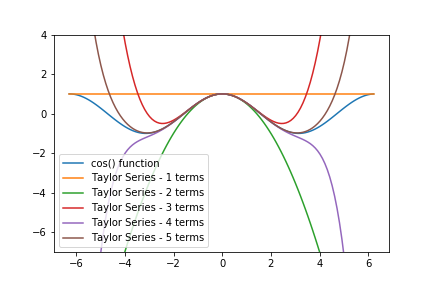

In this post, we will review how to create a Taylor Series with Python and for loops. Then we will refactor the Taylor Series into functions and compare the output of our Taylor Series functions to functions from Python's Standard Library.

A Taylor Series is an infinite series of mathematical terms that when summed together approximate a mathematical function. A Taylor Series can be used to approximate $e^{x}$, and `cosine`.

An example of a Taylor Series that approximates $e^{x}$ is below.

$$e^x\approx \sum _{n=0}^{\infty }\left(\frac{x^n}{n!}\right)\approx 1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+\frac{x^4}{4!}+\cdot \cdot \cdot \cdot $$

We can see that each term in the Taylor Series expansion is dependent on that term's place in the series. Below is a chart that shows each term of the Taylor Series in a row. The columns of the table represent the term index, the mathematical term and, how to code that term in Python. Note that the `factorial()` function is part of the `math` module in Python's Standard Library.

$\begin{array}{ccc} Term\:Index&Mathematical\:Term&Term\:coded\:in\:Python \\
0 & x^0/0! & x**0/math.factorial(0)               \\
1 & x^1/1! & x**1/math.factorial(1)              \\
2 & x^2/2! & x**2/math.factorial(2)              \\
3 & x^3/3! & x**3/math.factorial(3)              \\
4 & x^4/4! & x**4/math.factorial(4)
\end{array}$

## Code the Taylor Series by writing out each term individually

We can combine these terms in a line of Python code to estimate $e^2$. The code below calculates the sum of the first five terms of the Taylor Series expansion of ex, where x=2. Note the ``math`` module needs to be imported before ``math.factorial()`` can be used.

In [1]:
import math

x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_2)

7.0


Our Taylor Series approximation of $e^2$ was calculated as 7.0. Let's compare our Taylor Series approximation to Python's ``math.exp()`` function. Python's ``math.exp()`` function raises $e$ to any power. In our case, we want to use ``math.exp(2)`` because we want to calculate $e^2$.

In [2]:
print(math.exp(2))

7.38905609893065


Our Taylor Series approximation ``7.0`` is not that far off the calculated value ``7.389056...`` using Python's ``exp()`` function.

## Use a for loop to calculate a Taylor Series

If we want to get closer to the value of $e^x$, we need to add more terms to our Taylor Series. The problem is coding each individual term is time-consuming and repetitive. Instead of coding each term individually, we can use a for *loop*. A for *loop* is a repetition structure in Python that runs a section of code a specified number of times. The syntax for coding a for *loop* in Python using the ``range()`` function is below:

```txt
for <var> in range(<num>):
    <code>
```


Where `<var>` is any valid Python variable name and `<num>` is an integer to determines how many times the `<code>` in the loop runs.

We can recreate our approximation of $e^2$ with 5 terms using a for *loop*. Note we need to set the variable `e_to_2` to `0` before the loop starts. The mathematical operator `+=` in the line `e_to_2 += x**i/math.factorial(i)` is equivalent to `e_to_2 = e_to_2 + x**i/math.factorial(i)`.

In [3]:
import math

x = 2
e_to_2 = 0
for i in range(5):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.0


The result `7.0` is the same as the result we calculated when we wrote out each term of the Taylor Series individually.

An advantage of using a for *loop* is that we can easily increase the number of terms. If we increase the number of times the for loop runs, we increase the number of terms in the Taylor Series expansion. Let's try `10` terms. Note how the line `for i in range(10)`: now includes 10 passed to the `range()` function.


In [4]:
import math

x = 2
e_to_2 = 0
for i in range(10):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.3887125220458545


The result is `7.38871`.... Let's see how close that is to $e^2$ calculated with Python's `exp()` function.

In [5]:
print(math.exp(2))

7.38905609893065


The result is `7.38905....` We get closer to the value of $e^2$ when `10` terms are used in the Taylor Series compared to when `5` terms were used in the Taylor Series.

## Refactor the for loop into a function

Next, let's refactor the code above that contained a for loop (which calculated $e^2$) into a function that can compute $e$ raised to any power estimated with any number of terms in the Taylor Series. The general syntax to define a function in Python is below.

```txt
def <func name>(<arg 1>, <arg 2>, ...):
    <code>
    return <output>
```

Where `def` is the Python keyword that defines a function, `<func name>` is a valid Python variable name, and `<arg 1>, <arg 2>` are the input arguments passed to the function. `<code>` that runs when the function is called must be indented (the standard indentation is 4 spaces). The keyword `return` denotes the `<output>` of the function.

Let's code our for loop that approximates $e^2$ into a function.

In [6]:
import math

def func_e_to_2(n):
    x = 2
    e_to_2 = 0
    for i in range(n):
        e_to_2 += x**i/math.factorial(i)
    
    return e_to_2

If we call our function `func_e_to_2()` with the input argument `10`, the result is the same as when we ran the for *loop* 10 times.

In [7]:
out = func_e_to_2(10)
print(out)

7.3887125220458545


The output of our `func_e_to_2()` function is `7.38871....`

We can make our function more general by setting `x` (the number that $e$ gets raised to) as an input argument. Note how now there are two input arguments in the function definition `(x, n)`. `x` is the number $e$ is raised to, and `n` is the number of terms in the Taylor Series (which is the number of times the for loop runs on the inside of the function definition).

In [8]:
import math

def func_e(x, n):
    e_approx = 0
    for i in range(n):
        e_approx += x**i/math.factorial(i)
    
    return e_approx

Let's calculate $e^2$ using 10 terms with our new `func_e()` function.

In [9]:
out = func_e(2,10)
print(out)

7.3887125220458545


The result is `7.38871...`, the same result as before.

An advantage to writing our Taylor Series expansion in a function is that now the Taylor Series approximation calculation is reusable and can be called in one line of code. For instance, we can estimate the value of $e^5$ with `10` terms, by calling our `func_e()` function with the input arguments ``(5,10)``.

In [10]:
out = func_e(5,10)
print(out)

143.68945656966488


The result is `143.68945....` Let's see how close this value is to Python's `exp()` function when we make the same calculation $e^5$.

In [11]:
out = math.exp(5)
print(out)

148.4131591025766


The result is `148.41315....` The Taylor Series approximation calculated by our func_e() function is pretty close to the value calculated by Python's `exp()` function.

## Use a for loop to calculate the difference between the Taylor Series expansion and Python's `exp()` function

Now let's use a for loop to calculate the difference between the Taylor Series expansion as calculated by our `func_e()` function compared to Python's `exp()` function. We'll calculate the difference between the two functions when we use between `1` and `10` terms in the Taylor Series expansion.

The code below uses f-strings, which is a Python syntax for inserting the value of a variable in a string. The general syntax for an f-string in Python is below.

```txt
f'string statment {<var>}'
```

Where `f` denotes the beginning of an f-string, the f-string is surrounded by quotes `' '`, and the variable `<var>` is enclosed in curly braces `{ }`. The value of `<var>` will be printed out without the curly braces.

In [12]:
import math

x = 5
for i in range(1,11):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 148.4131591025766, error = 147.4131591025766
2 terms: Taylor Series approx= 6.0, exp calc= 148.4131591025766, error = 142.4131591025766
3 terms: Taylor Series approx= 18.5, exp calc= 148.4131591025766, error = 129.9131591025766
4 terms: Taylor Series approx= 39.33333333333333, exp calc= 148.4131591025766, error = 109.07982576924327
5 terms: Taylor Series approx= 65.375, exp calc= 148.4131591025766, error = 83.0381591025766
6 terms: Taylor Series approx= 91.41666666666667, exp calc= 148.4131591025766, error = 56.99649243590993
7 terms: Taylor Series approx= 113.11805555555556, exp calc= 148.4131591025766, error = 35.29510354702104
8 terms: Taylor Series approx= 128.61904761904762, exp calc= 148.4131591025766, error = 19.79411148352898
9 terms: Taylor Series approx= 138.30716765873015, exp calc= 148.4131591025766, error = 10.105991443846449
10 terms: Taylor Series approx= 143.68945656966488, exp calc= 148.4131591025766, error = 4.723702532911

Note how the error decreases as we add terms to the Taylor Series. When the Taylor Series only has 1 term, the error is `147.41....` When `10` terms are used in the Taylor Series, the error goes down to `4.7237....`

## Use a `break` statement to exit a for loop early.

How many terms would it take to produce an error of less than `1`? We can use a `break` statement to drop out of the for loop when the error is less than `1`. The code below calculates how many terms are needed in the Taylor Series, when $e^5$ is calculated, to keep the error less than `1`.

In [ ]:
import math

x = 5
for i in range(1,20):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    if e_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

The output shows that it takes `12` terms in the Taylor Series to drop the error below `1`.

## Create a function to estimate the value of cos(x) using a Taylor Series

Next, let's calculate the value of the cosine function using a Taylor Series. The Taylor Series expansion for $cos(x)$ is below.

$$cos\left(x\right)\approx \:\sum \:_{n=0}^{\infty \:}\left(\left(-1\right)^n\cdot \frac{x^{2\cdot n}}{\left(2\cdot n\right)!}\right)\approx 1-\frac{x^2}{2!}+\frac{x^4}{6!}-\frac{x^6}{6!}\cdot \:\cdot \:\cdot \:\cdot \:$$

We can code this formula into a function that contains a for loop. Note the variable `x` is the value we are trying to find the cosine of, the variable `n` is the number of terms in the Taylor Series, and the variable `i` is the loop index which is also the Taylor Series term number. We are using a separate variable for the coefficient `coef` which is equal to $(−1)^i$, the numerator `num` which is equal to $x^{2i}$ and the denominator `denom` which is equal to $(2i!)$. Breaking the Taylor Series formula into three parts can cut down on coding errors.

In [15]:
import math

def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

Let's use our `func_cos()` function to estimate the cosine of 45 degrees. Note that `func_cos()` function computes the cosine of an angle in radians. If we want to calculate the cosine of 45 degrees using our function, we first have to convert 45 degrees into radians. Luckily, Python's `math` module has a function called `radians()` that makes the angle conversion early.

In [16]:
angle_rad = (math.radians(45))
out = func_cos(angle_rad,5)
print(out)

0.7071068056832942


Using our `func_cos()` function and `5` terms in the Taylor Series approximation, we estimate the cosine of 45 degrees is `0.707106805....` Let's check our `func_cos()` function compared to Python's `cos()` function from the `math` module.

In [17]:
out = math.cos(angle_rad)
print(out)

0.7071067811865476


Using Python's `cos()` function, the cosine of 45 degrees returns `0.707106781...` This value is very close to the approximation calculated using our `func_cos()` function.

## Build a plot to compare the Taylor Series approximation to Python's `cos()` function

In the last part of this post, we are going to build a plot that shows how the Taylor Series approximation calculated by our `func_cos()` function compares to Python's ``cos()`` function.

The idea is to make a plot that has one line for Python's ``cos()`` function and lines for the Taylor Series approximation based on different numbers of terms.

For instance, if we use 3 terms in the Taylor Series approximation, our plot has two lines. One line for Python's ``cos()`` function and one line for our ``func_cos()`` function with three terms in the Taylor series approximation. We'll calculate the cosine using both functions for angles between $−2π$ radians and $2π$ radians.

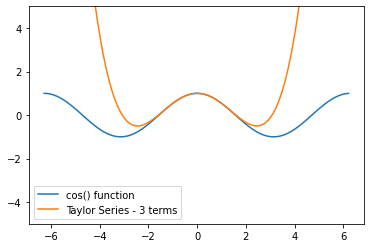

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)
t_cos = [func_cos(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_cos)
ax.plot(angles,t_cos)
ax.set_ylim([-5,5])
ax.legend(['cos() function','Taylor Series - 3 terms'])

plt.show()

We can use a for loop to see how much better adding additional terms to our Taylor Series approximation compares to Python's ``cos()`` function.

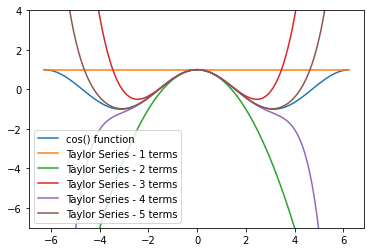

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

## Summary

In this post, we reviewed how to construct the Taylor Series of $e^x$ and $cos(x)$ in Python. First, we coded each term of the Taylor series individually. Next, we used a for *loop* to calculate $n$ terms in the Taylor Series expansion. We then refactored the code with the for *loop* into a function and parameterized our function so that we could calculate $e$ raised to any number calculated out to any number of terms. At the end of the post, we coded the Taylor Series of $cos(x)$ into a Python function. Finally, we used our Taylor Series cosine function to build a plot with **Matplotlib** that shows how the Taylor Series approximation compares to Python's `cos()` function for angles between $−2π$ and $2π$ radians.

*Code will be used, based on https://pythonforundergradengineers.com/creating-taylor-series-functions-with-python.html for ln(x+1) and sin(x) functions*

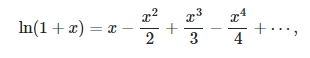

In [20]:
## Funcion usando un loop
def fun_lnxmasuno(x,n):
  res = 0 
  for i in range(1,n):
    res += -( ((-1)**i)*(x**i)/i )
  return res
print(fun_lnxmasuno(1,1000))

0.6936474305598223


In [21]:
## Comparación entre la función hecha con serie de Taylor y la función implementada en math 
import math
math.log(2)

0.6931471805599453

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


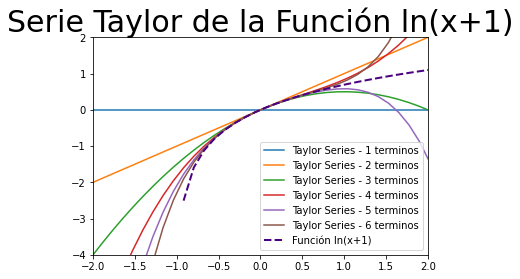

In [22]:
##graficando la comparacion 
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3,3)
for v in range(1,7):
  arr = []
  for c in x:
    arr.append(fun_lnxmasuno(c,v))
  labelm = f'Taylor Series - {str(v)} terminos'
  plt.plot(x,arr, label = labelm )
    
plt.title('Serie Taylor de la Función ln(x+1)',fontsize= 30) 
plt.plot(x, np.log(x+1), label= "Función ln(x+1)", linewidth = 2, linestyle = "--", color = "indigo")
plt.legend() 
plt.xlim(-2, 2)
plt.ylim(-4,2)                          
plt.show()

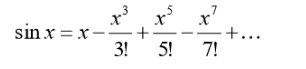

In [23]:
## Funcion usando un loop
def fun_sin(x,n):
  x = x+ 0.0
  res = x
  for i in range(1,n):
    res += ((-1**i)*(x**(2*i+1)))/(math.factorial(2*i+1))
  return res
print(fun_sin(1.0,50))

0.8247988063561986


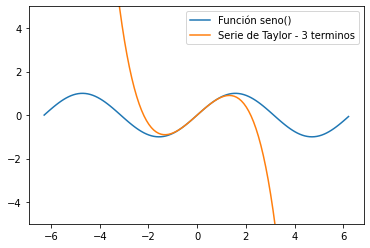

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.sin(angles)
t_cos = [fun_sin(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_cos)
ax.plot(angles,t_cos)
ax.set_ylim([-5,5])
ax.legend(['Función seno()','Serie de Taylor - 3 terminos'])

plt.show()

# ***2. Taylor Series Expansion with Python from Data Science Fabric***

https://dsfabric.org/taylor-series-expansion-with-python

In [25]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp, log
from sympy.plotting import plot
import matplotlib.pyplot as plt
import math

# Define symbol
x = Symbol('x')

# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

print('sin(x) ≅', taylor(sin(x), 0, 4))

print('ln(x+1) ≅', taylor(log((x+1), math.e), 0, 4))

sin(x) ≅ -x**3/6 + x
ln(x+1) ≅ 0.333333333333333*x**3 - 0.5*x**2 + 1.0*x


In [26]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))
print('ln(2) =', taylor(log(x+1), 0, 4).subs(x,1))

sin(1) = 5/6
ln(2) = 5/6


In [27]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ x
Taylor 3 sin(x) ≅ x
Taylor 4 sin(x) ≅ -x**3/6 + x
Taylor 5 sin(x) ≅ -x**3/6 + x
Taylor 6 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 7 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 8 sin(x) ≅ -x**7/5040 + x**5/120 - x**3/6 + x


In [28]:
print('Taylor 0 log((x+1) ≅', taylor(log(x+1), 0, 0))
print('Taylor 1 log((x+1) ≅', taylor(log(x+1), 0, 1))
print('Taylor 2 log((x+1) ≅', taylor(log(x+1), 0, 2))
print('Taylor 3 log((x+1) ≅', taylor(log(x+1), 0, 3))
print('Taylor 4 log((x+1) ≅', taylor(log(x+1), 0, 4))
print('Taylor 5 log((x+1) ≅', taylor(log(x+1), 0, 5))
print('Taylor 6 log((x+1) ≅', taylor(log(x+1), 0, 6))
print('Taylor 7 log((x+1) ≅', taylor(log(x+1), 0, 7))
print('Taylor 8 log((x+1) ≅', taylor(log(x+1), 0, 8))

Taylor 0 log((x+1) ≅ 0
Taylor 1 log((x+1) ≅ 0
Taylor 2 log((x+1) ≅ x
Taylor 3 log((x+1) ≅ -x**2/2 + x
Taylor 4 log((x+1) ≅ x**3/3 - x**2/2 + x
Taylor 5 log((x+1) ≅ -x**4/4 + x**3/3 - x**2/2 + x
Taylor 6 log((x+1) ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 7 log((x+1) ≅ -x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 8 log((x+1) ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [29]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0).subs(x,2),' = ',taylor(sin(x), 0, 0).subs(x,2).evalf())
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1).subs(x,2),' = ',taylor(sin(x), 0, 1).subs(x,2).evalf())
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2).subs(x,2),' = ',taylor(sin(x), 0, 2).subs(x,2).evalf())
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3).subs(x,2),' = ',taylor(sin(x), 0, 3).subs(x,2).evalf())
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4).subs(x,2),' = ',taylor(sin(x), 0, 4).subs(x,2).evalf())
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5).subs(x,2),' = ',taylor(sin(x), 0, 5).subs(x,2).evalf())
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6).subs(x,2),' = ',taylor(sin(x), 0, 6).subs(x,2).evalf())
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 8).subs(x,2),' = ',taylor(sin(x), 0, 7).subs(x,2).evalf())

Taylor 0 sin(x) ≅ 0  =  0
Taylor 1 sin(x) ≅ 0  =  0
Taylor 2 sin(x) ≅ 2  =  2.00000000000000
Taylor 3 sin(x) ≅ 2  =  2.00000000000000
Taylor 4 sin(x) ≅ 2/3  =  0.666666666666667
Taylor 5 sin(x) ≅ 2/3  =  0.666666666666667
Taylor 6 sin(x) ≅ 14/15  =  0.933333333333333
Taylor 7 sin(x) ≅ 286/315  =  0.933333333333333


In [30]:
print('Taylor 0 log(x+1) ≅', taylor(log(x+1), 0, 0).subs(x+1,2),' = ',taylor(log(x+1), 0, 0).subs(x+1,2).evalf())
print('Taylor 1 log(x+1) ≅', taylor(log(x+1), 0, 1).subs(x+1,2),' = ',taylor(log(x+1), 0, 1).subs(x+1,2).evalf())
print('Taylor 2 log(x+1) ≅', taylor(log(x+1), 0, 2).subs(x+1,2),' = ',taylor(log(x+1), 0, 2).subs(x+1,2).evalf())
print('Taylor 3 log(x+1) ≅', taylor(log(x+1), 0, 3).subs(x+1,2),' = ',taylor(log(x+1), 0, 3).subs(x+1,2).evalf())
print('Taylor 4 log(x+1) ≅', taylor(log(x+1), 0, 4).subs(x+1,2),' = ',taylor(log(x+1), 0, 4).subs(x+1,2).evalf())
print('Taylor 5 log(x+1) ≅', taylor(log(x+1), 0, 5).subs(x+1,2),' = ',taylor(log(x+1), 0, 5).subs(x+1,2).evalf())
print('Taylor 6 log(x+1) ≅', taylor(log(x+1), 0, 6).subs(x+1,2),' = ',taylor(log(x+1), 0, 6).subs(x+1,2).evalf())
print('Taylor 7 log(x+1) ≅', taylor(log(x+1), 0, 8).subs(x+1,2),' = ',taylor(log(x+1), 0, 7).subs(x+1,2).evalf())

Taylor 0 log(x+1) ≅ 0  =  0
Taylor 1 log(x+1) ≅ 0  =  0
Taylor 2 log(x+1) ≅ x  =  x
Taylor 3 log(x+1) ≅ 1 - x**2/2  =  1.0 - 0.5*x**2
Taylor 4 log(x+1) ≅ x**3/3 - x**2/2 + 1  =  0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 5 log(x+1) ≅ -x**4/4 + x**3/3 - x**2/2 + 1  =  -0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 6 log(x+1) ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + 1  =  0.2*x**5 - 0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 7 log(x+1) ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + 1  =  -0.166666666666667*x**6 + 0.2*x**5 - 0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0


In [31]:
import math
print('sympy sin(x)subs(x,2) =', sin(x).subs(x,2))
print('sympy sin(x).subs(x,2).evalf() =', sin(x).subs(x,2).evalf())
print('math.sin(2) =', math.sin(2))

sympy sin(x)subs(x,2) = sin(2)
sympy sin(x).subs(x,2).evalf() = 0.909297426825682
math.sin(2) = 0.9092974268256817


In [32]:
print('sympy log(x+1)subs(x+1,2) =', log(x+1).subs(x,2))
print('sympy log(x+1).subs(x,2).evalf() =', log(x+1).subs(x,2).evalf())
print('math.log(3) =', math.log(3))

sympy log(x+1)subs(x+1,2) = log(3)
sympy log(x+1).subs(x,2).evalf() = 1.09861228866811
math.log(3) = 1.0986122886681098


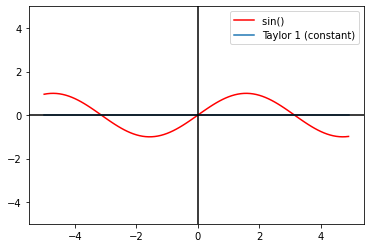

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin1 = [taylor(sin(x), 0, 1).subs(x,v) for v in values]
legends = ['sin() ','Taylor 1 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

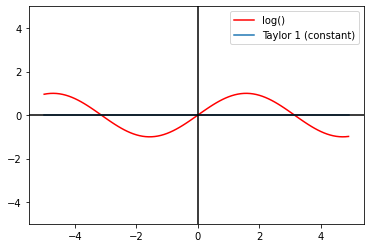

In [34]:
values = np.arange(-5,5,0.1)
p_log = np.sin(values)
t_log1 = [taylor(log(x+1), 0, 1).subs(x,v) for v in values]
legends = ['log() ','Taylor 1 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='red')
ax.plot(values,t_log1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

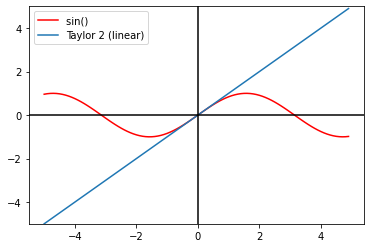

In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin2 = [taylor(sin(x), 0, 2).subs(x,v) for v in values]
legends = ['sin() ','Taylor 2 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


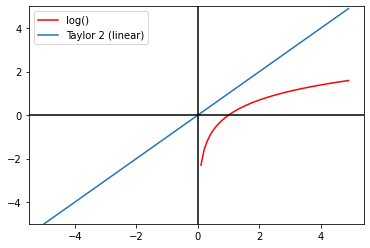

In [36]:
values = np.arange(-5,5,0.1)
p_log = np.log(values)
t_log2 = [taylor(log(x+1), 0, 2).subs(x,v) for v in values]
legends = ['log() ','Taylor 2 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='red')
ax.plot(values,t_log2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

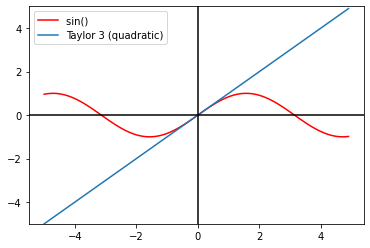

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin3 = [taylor(sin(x), 0, 3).subs(x,v) for v in values]
legends = ['sin() ','Taylor 3 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


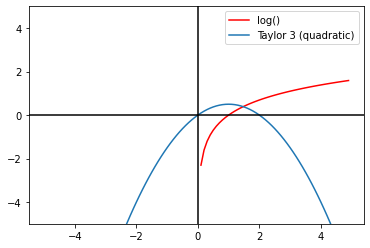

In [38]:
values = np.arange(-5,5,0.1)
p_log = np.log(values)
t_log3 = [taylor(log(x+1), 0, 3).subs(x,v) for v in values]
legends = ['log() ','Taylor 3 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='red')
ax.plot(values,t_log3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

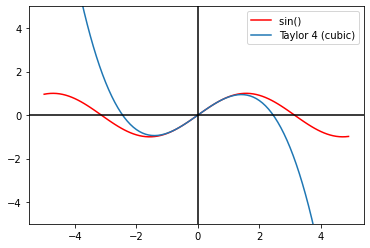

In [39]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin4 = [taylor(sin(x), 0, 4).subs(x,v) for v in values]
legends = ['sin() ','Taylor 4 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


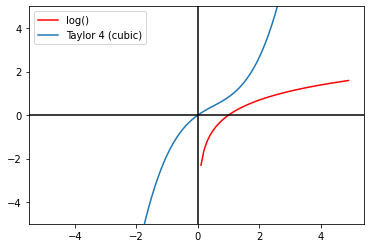

In [40]:
values = np.arange(-5,5,0.1)
p_log = np.log(values)
t_log4 = [taylor(log(x+1), 0, 4).subs(x,v) for v in values]
legends = ['log() ','Taylor 4 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='red')
ax.plot(values,t_log4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

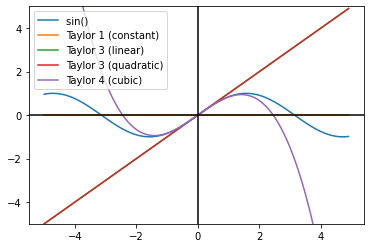

In [41]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin1 = [taylor(sin(x), 0, 1).subs(x,v) for v in values]
t_sin2 = [taylor(sin(x), 0, 2).subs(x,v) for v in values]
t_sin3 = [taylor(sin(x), 0, 3).subs(x,v) for v in values]
t_sin4 = [taylor(sin(x), 0, 4).subs(x,v) for v in values]
legends = ['sin() ','Taylor 1 (constant)','Taylor 3 (linear)','Taylor 3 (quadratic)','Taylor 4 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin)
ax.plot(values,t_sin1)
ax.plot(values,t_sin2)
ax.plot(values,t_sin3)
ax.plot(values,t_sin4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


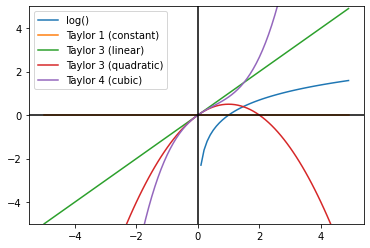

In [42]:
values = np.arange(-5,5,0.1)
p_log = np.log(values)
t_log1 = [taylor(log(x+1), 0, 1).subs(x,v) for v in values]
t_log2 = [taylor(log(x+1), 0, 2).subs(x,v) for v in values]
t_log3 = [taylor(log(x+1), 0, 3).subs(x,v) for v in values]
t_log4 = [taylor(log(x+1), 0, 4).subs(x,v) for v in values]
legends = ['log() ','Taylor 1 (constant)','Taylor 3 (linear)','Taylor 3 (quadratic)','Taylor 4 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_log)
ax.plot(values,t_log1)
ax.plot(values,t_log2)
ax.plot(values,t_log3)
ax.plot(values,t_log4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

# ***3. Taylor $e^x$ Error***



In [43]:
import math

x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_2)

7.0


In [44]:
print(math.exp(2))

7.38905609893065


In [45]:
import math

x = 2
e_to_2 = 0
for i in range(10):
    e_to_2 += x**i/math.factorial(i) 
print(e_to_2)

7.3887125220458545


For the Taylor series for $f(x) = e^x$ about $c=0$ (Maclaurin) 

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} = \frac{e^\xi}{(n+1)!}x^{(n+1)} \le  \frac{e^x}{(n+1)!}x^{(n+1)},\text{ given that } $$


If we want $E_n \le \epsilon$ then we need $n$ such that because $e^x \ge e^\xi$, for  $c=0 \le \xi \le x$ 


$$ \frac{e^x}{(n+1)!}x^{(n+1)} < \epsilon$$ 

because $e^x \ge e^\xi$, for  $0 \le \xi \le x$.

In [46]:
import math

x = 1
epsilon = 10**(-12)

for k in range(1000):
  if (  ( (math.exp(x) * x**(k+1)) / math.factorial(k+1) ) < epsilon):
    break
print(k)

e_to_x = 0
for i in range(k):
    print(i,' ',e_to_x, ' delta ', x**i/math.factorial(i))
    e_to_x += x**i/math.factorial(i) 
    
print('math.exp(10) = ',math.exp(1))

15
0   0  delta  1.0
1   1.0  delta  1.0
2   2.0  delta  0.5
3   2.5  delta  0.16666666666666666
4   2.6666666666666665  delta  0.041666666666666664
5   2.708333333333333  delta  0.008333333333333333
6   2.7166666666666663  delta  0.001388888888888889
7   2.7180555555555554  delta  0.0001984126984126984
8   2.7182539682539684  delta  2.48015873015873e-05
9   2.71827876984127  delta  2.7557319223985893e-06
10   2.7182815255731922  delta  2.755731922398589e-07
11   2.7182818011463845  delta  2.505210838544172e-08
12   2.718281826198493  delta  2.08767569878681e-09
13   2.7182818282861687  delta  1.6059043836821613e-10
14   2.7182818284467594  delta  1.1470745597729725e-11
math.exp(10) =  2.718281828459045


$$ \frac{e^x}{(n+1)!}x^{(n+1)} < \frac{3^x}{(n+1)!}x^{(n+1)} < \epsilon$$ 

In [47]:
import math

x = 1
epsilon = 10**(-8)

for k in range(1000):
  if (  ( (3**x * x**(k+1)) / math.factorial(k+1) ) < epsilon):
    break
print(k)

e_to_x = 0
for i in range(k+1):
    print(i,' ',e_to_x, ' delta ', x**i/math.factorial(i))
    e_to_x += x**i/math.factorial(i) 
    
print('math.exp(10) = ',math.exp(10))

11
0   0  delta  1.0
1   1.0  delta  1.0
2   2.0  delta  0.5
3   2.5  delta  0.16666666666666666
4   2.6666666666666665  delta  0.041666666666666664
5   2.708333333333333  delta  0.008333333333333333
6   2.7166666666666663  delta  0.001388888888888889
7   2.7180555555555554  delta  0.0001984126984126984
8   2.7182539682539684  delta  2.48015873015873e-05
9   2.71827876984127  delta  2.7557319223985893e-06
10   2.7182815255731922  delta  2.755731922398589e-07
11   2.7182818011463845  delta  2.505210838544172e-08
math.exp(10) =  22026.465794806718


In [48]:
import math

x = 1
epsilon = 10**(-3)
delta = 1
e_to_x = 0
i = 0
while  epsilon <= delta:
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  i = i+1
print(i-1) 
print('e_to_x = ',e_to_x)    
print('math.exp(1) = ',math.exp(1))

7
e_to_x =  2.7182539682539684
math.exp(1) =  2.718281828459045


## $sin (x)$

In [49]:
import math

x = 10
epsilon = 10**(-4)

for k in range(1000):
  coef = (-1)**k
  num = x**(2*k + 1)
  denom = math.factorial(2*k + 1)
  if abs((math.sin(x) * ( coef * ( (num)/(denom) ) ))) < epsilon:
    break
print(k)

sin = 0
for i in range(k):
  coef = (-1)**i
  num = x**(2*i + 1)
  denom = math.factorial(2*i + 1)
  print(i,' ',sin, ' delta ', abs(( coef ) * ( (num)/(denom) )))
  sin += ( coef ) * ( (num)/(denom) )
    
print('math.sin(10) = ', math.sin(x))

16
0   0  delta  10.0
1   10.0  delta  166.66666666666666
2   -156.66666666666666  delta  833.3333333333334
3   676.6666666666667  delta  1984.126984126984
4   -1307.4603174603174  delta  2755.731922398589
5   1448.2716049382718  delta  2505.210838544172
6   -1056.9392336059002  delta  1605.9043836821616
7   548.9651500762614  delta  764.7163731819817
8   -215.75122310572033  delta  281.14572543455205
9   65.39450232883172  delta  82.2063524662433
10   -16.811850137411582  delta  19.572941063391262
11   2.76109092597968  delta  3.868170170630684
12   -1.107079244651004  delta  0.6446950284384474
13   -0.46238421621255665  delta  0.09183689863795547
14   -0.5542211148505121  delta  0.011309962886447717
15   -0.5429111519640644  delta  0.001216125041553518
math.sin(10) =  -0.5440211108893698


In [50]:
import math

x = 10
epsilon = 10**(-4)
delta = 1
sin = 0
i = 0
while  epsilon <= abs(delta):
  coef = (-1)**i
  num = x**(2*i + 1)
  denom = math.factorial(2*i + 1)
  delta = ( coef ) * ( (num)/(denom) )
  sin += delta
  i = i+1
print(i-1) 
print('sin = ',sin)    
print('math.sin(10) = ',math.sin(x))

17
sin =  -0.5440217912423688
math.sin(10) =  -0.5440211108893698


## $ln (1+x)$

In [51]:
import numpy as np
import math

x = 0.1
epsilon = 10**(-16)

for k in range(1, 1000):
  if abs((np.log(1+x) * (-( ((-1)**k)*(x**k)/k )))) < epsilon:
    break
print(k)

log_1 = 0
for i in range(1, k):
  print(i,' ',log_1, ' delta ', ((-( ((-1)**i)*(x**i)/i ))))
  log_1 += ((-( ((-1)**i)*(x**i)/i )))

a = np.log(1+x)
print('ln(1+n) = ', a)

14
1   0  delta  0.1
2   0.1  delta  -0.005000000000000001
3   0.095  delta  0.00033333333333333343
4   0.09533333333333334  delta  -2.5000000000000005e-05
5   0.09530833333333334  delta  2.0000000000000003e-06
6   0.09531033333333334  delta  -1.6666666666666673e-07
7   0.09531016666666668  delta  1.4285714285714291e-08
8   0.09531018095238097  delta  -1.2500000000000006e-09
9   0.09531017970238097  delta  1.1111111111111116e-10
10   0.09531017981349207  delta  -1.0000000000000006e-11
11   0.09531017980349207  delta  9.090909090909096e-13
12   0.09531017980440117  delta  -8.333333333333339e-14
13   0.09531017980431783  delta  7.692307692307697e-15
ln(1+n) =  0.09531017980432493


In [52]:
import math

x = 0.1
epsilon = 10**(-4)
delta = 1
function = 0
i = 1
while  epsilon <= delta:
  delta = (-( ((-1)**i)*(x**i)/i ))
  function += delta
  i = i+1
print(i-1) 
print('ln(1+x) = ',function)    
print('ln(1+x) = ',np.log(1+x))

2
ln(1+x) =  0.095
ln(1+x) =  0.09531017980432493
